### 데이터 전처리

In [1]:
import pandas as pd

df = pd.read_csv("./titanic_train.csv", index_col=["PassengerId"])
print(df.shape)
df.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df["Age"].fillna(df["Age"].mean(),inplace = True)
df["Cabin"].fillna("N",inplace = True)
df["Embarked"].fillna("N",inplace = True)

In [3]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [4]:
print(df["Sex"].value_counts())
print(df["Cabin"].value_counts())
print(df["Embarked"].value_counts())

male      577
female    314
Name: Sex, dtype: int64
N              687
B96 B98          4
C23 C25 C27      4
G6               4
F2               3
              ... 
D9               1
D15              1
D47              1
B80              1
C128             1
Name: Cabin, Length: 148, dtype: int64
S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [5]:
df["Cabin"]=df["Cabin"].str[:1]

 예측에 의미없는 피처 제거

In [6]:
df.drop(["Name", "SibSp", "Ticket", "Parch"], axis=1, inplace=True)

In [7]:
embarked = pd.get_dummies(df["Embarked"], prefix="Embarked")
cabin = pd.get_dummies(df["Cabin"], prefix="Cabin")
sex = pd.get_dummies(df["Sex"], prefix="Sex")
df = pd.concat([df, embarked, cabin, sex], axis=1)

In [8]:
df.drop(["Embarked", "Cabin", "Sex"], axis=1, inplace=True)
df

,Survived,Pclass,Age,Fare,Embarked_C,Embarked_N,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Cabin_T,Sex_female,Sex_male
PassengerId,,,,,,,,,,,,,,,,,,,
1,0,3,22.000000,7.2500,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
2,1,1,38.000000,71.2833,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,1,3,26.000000,7.9250,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
4,1,1,35.000000,53.1000,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
5,0,3,35.000000,8.0500,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,27.000000,13.0000,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
888,1,1,19.000000,30.0000,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
889,0,3,29.699118,23.4500,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [9]:
df.isnull().sum()

Survived      0
Pclass        0
Age           0
Fare          0
Embarked_C    0
Embarked_N    0
Embarked_Q    0
Embarked_S    0
Cabin_A       0
Cabin_B       0
Cabin_C       0
Cabin_D       0
Cabin_E       0
Cabin_F       0
Cabin_G       0
Cabin_N       0
Cabin_T       0
Sex_female    0
Sex_male      0
dtype: int64

In [10]:
y = df["Survived"]
x =  df.drop("Survived", axis=1)
x

,Pclass,Age,Fare,Embarked_C,Embarked_N,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Cabin_T,Sex_female,Sex_male
PassengerId,,,,,,,,,,,,,,,,,,
1,3,22.000000,7.2500,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
2,1,38.000000,71.2833,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,3,26.000000,7.9250,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
4,1,35.000000,53.1000,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
5,3,35.000000,8.0500,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,27.000000,13.0000,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
888,1,19.000000,30.0000,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
889,3,29.699118,23.4500,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [11]:
print(x.columns)
print(y)

Index(['Pclass', 'Age', 'Fare', 'Embarked_C', 'Embarked_N', 'Embarked_Q',
       'Embarked_S', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
       'Cabin_F', 'Cabin_G', 'Cabin_N', 'Cabin_T', 'Sex_female', 'Sex_male'],
      dtype='object')
PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64


### 랜덤탐색을 통한 최적의 분류모델 생성

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=121)

In [30]:
import numpy as np
from sklearn.model_selection import cross_val_score

hyperparameters_list = []


num_epoch = 10

for epoch in range(num_epoch):
    max_depth = np.random.randint(low=2, high=100)
    max_features = np.random.uniform(low=0.1, high=1.0)
    min_samples_leaf = np.random.randint(low=1, high=10) 
    d_clf = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf,
                                   max_depth=max_depth,
                                   max_features=max_features,
                                   random_state=121
                                   )
    score = cross_val_score(d_clf, x_train, y_train, cv=20, 
                            scoring="accuracy").mean()

    hyperparameters_list.append({
        'score': score,
        'max_depth': max_depth,
        'max_features': max_features,
        "min_samples_leaf": min_samples_leaf
    })

    print("Score = {0:.5f}".format(score))

hyperparameters_list = pd.DataFrame.from_dict(hyperparameters_list)
hyperparameters_list = hyperparameters_list.sort_values(by="score")

print(hyperparameters_list.shape)
print(hyperparameters_list.head())
print(hyperparameters_list["score"].mean())

Score = 0.77242
Score = 0.81295
Score = 0.70964
Score = 0.79658
Score = 0.79219
Score = 0.80037
Score = 0.79775
Score = 0.80871
Score = 0.78659
Score = 0.80748
(10, 4)
      score  max_depth  max_features  min_samples_leaf
2  0.709635          2      0.475679                 5
0  0.772422         26      0.358791                 1
8  0.786593         53      0.145639                 4
4  0.792188         60      0.586320                 9
3  0.796584         65      0.181257                 8
0.7884686829686831


### 최적의 의사결정나무 모델 결정!!

In [15]:
d_clf = DecisionTreeClassifier(max_depth=16, max_features=0.916605,min_samples_leaf=3, random_state=121)
d_clf.fit(x_train, y_train)
d_clf.score(x_test, y_test)

0.7877094972067039

### 가장 설명력이 좋은 상위 4가지 특성 확인

In [16]:
data = list(zip(x.columns,d_clf.feature_importances_))
df_importance=pd.DataFrame(data, columns=["features", "importance"])
df_importance_= df_importance.sort_values(by="importance", ascending=False)

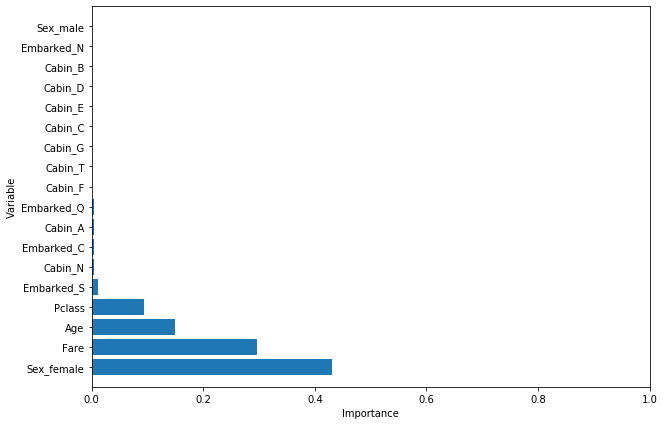

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
x = df_importance_.features
y = df_importance_.importance
ypos = np.arange(len(x))

plt.figure(figsize=(10,7))
plt.barh(x, y)
plt.yticks(ypos, x)
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.xlim(0, 1)
plt.ylim(-1, len(x))
plt.show()

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors, datasets
from sklearn.model_selection import cross_val_score

In [19]:
k = list(range(1,20))

 knn의 메서드인 score함수와  cross_val_score을 동시에 확인

In [20]:
score_list = []
cross_score_list = []
for i in range(1,20):
    knn = neighbors.KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    scores = cross_val_score(knn,x_test,y_test,scoring="accuracy",cv=10)
    score_list.append(knn.score(x_test, y_test))
    cross_score_list.append(scores.mean())
    print("K가", i, "일때 정확도: {}".format(knn.score(x_test, y_test)), end=" / ")
    print(scores.mean())

K가 1 일때 정확도: 0.6927374301675978 / 0.5742862057103542
K가 2 일때 정확도: 0.664804469273743 / 0.6475232198142415
K가 3 일때 정확도: 0.7374301675977654 / 0.5594083247334021
K가 4 일때 정확도: 0.6871508379888268 / 0.5544719642242861
K가 5 일때 정확도: 0.6983240223463687 / 0.5822841417268663
K가 6 일때 정확도: 0.6983240223463687 / 0.5921912624699003
K가 7 일때 정확도: 0.6759776536312849 / 0.626797385620915
K가 8 일때 정확도: 0.6871508379888268 / 0.6373237014103887
K가 9 일때 정확도: 0.6815642458100558 / 0.6209150326797386
K가 10 일때 정확도: 0.6759776536312849 / 0.6645166838665291
K가 11 일때 정확도: 0.6927374301675978 / 0.6592535259717922
K가 12 일때 정확도: 0.7039106145251397 / 0.6595803233574131
K가 13 일때 정확도: 0.6983240223463687 / 0.6598727210182319
K가 14 일때 정확도: 0.7039106145251397 / 0.641967664258686
K가 15 일때 정확도: 0.6815642458100558 / 0.6425868593051256
K가 16 일때 정확도: 0.6815642458100558 / 0.6422944616443069
K가 17 일때 정확도: 0.6759776536312849 / 0.6253009975920193
K가 18 일때 정확도: 0.6927374301675978 / 0.653405572755418
K가 19 일때 정확도: 0.6759776536312849 / 0.6484

In [21]:
total = list(zip( score_list, cross_score_list))
df = pd.DataFrame(total, columns = [ "knn-score", "cross-score"])
df["k의 수"] = k
df = df.set_index("k의 수")
df_normal = df.sort_values("knn-score", ascending = False)
print(df_normal.mean())
print(df_normal)

knn-score      0.689797
cross-score    0.625918
dtype: float64
      knn-score  cross-score
k의 수                        
3      0.737430     0.559408
12     0.703911     0.659580
14     0.703911     0.641968
5      0.698324     0.582284
6      0.698324     0.592191
13     0.698324     0.659873
1      0.692737     0.574286
18     0.692737     0.653406
11     0.692737     0.659254
4      0.687151     0.554472
8      0.687151     0.637324
16     0.681564     0.642294
9      0.681564     0.620915
15     0.681564     0.642587
17     0.675978     0.625301
10     0.675978     0.664517
7      0.675978     0.626797
19     0.675978     0.648469
2      0.664804     0.647523


cross_val_score 보다는 knn의 메서드함수를 쓰는 것이 더 정확도 높다.

### 가중치 부여를 통해 knn의 정확도를 더 높여본다.

In [24]:
import warnings
warnings.filterwarnings(action='ignore') 
from sklearn.model_selection import GridSearchCV
grid_score = []
grid_cross_score = []
weights_options = ['uniform','distance']
for i in range(1,20):
    knn = neighbors.KNeighborsClassifier(i)
    knn_grid = dict(weights = weights_options)
    grid = GridSearchCV(knn, knn_grid, cv=10, scoring = 'accuracy')
    grid.fit(x_train,y_train)
    scores = cross_val_score(grid,x_test,y_test,scoring="accuracy",cv=10)
    grid_score.append(grid.best_score_)
    grid_cross_score.append(scores.mean())

df = pd.DataFrame({"grid_score":grid_score, "grid_cross_score":grid_cross_score
                  ,"k의 개수":k})
df

,grid_score,grid_cross_score,k의 개수
0,0.698034,0.574286,1
1,0.706461,0.619745,2
2,0.724719,0.564964,3
3,0.735955,0.540884,4
4,0.730337,0.559735,5
5,0.734551,0.574905,6
6,0.741573,0.586601,7
7,0.748596,0.592157,8
8,0.745787,0.603302,9
9,0.752809,0.636343,10


In [25]:
df["grid_score"].mean()

0.7364725014784154

정확도가 한 층 더 높아졌다.

In [26]:
final_df = df.set_index("k의 개수")
printfinal_df.sort_values("grid_score", ascending=False)

,grid_score,grid_cross_score
k의 개수,,
10,0.752809,0.636343
8,0.748596,0.592157
11,0.747191,0.648435
9,0.745787,0.603302
13,0.744382,0.613794
12,0.742978,0.619677
15,0.741573,0.602098
19,0.741573,0.608892
7,0.741573,0.586601


In [31]:
final_df["grid_score"].mean()

0.7364725014784154

과제를 마치며 
    결정트리와 kNN으로 각각 예측했을 때 평균 정확도는 0.78과 0.73이다. 
    또한 가장 정확도가 높을 때는 각각 0.796584, 0.752809로 결론적으로 봤을 때는 
    타이타닉 예제에서 더 높은 성능을 보이는 모델은 결정트리였다고 할 수 있다. 
    또한 feature_importance_ 메서드를 통해 그래프와 데이터프레임으로 가장 중요한 변수를 확인해봤을 때 
    Sex_female, Fare, Age, Pclass 변수가 가장 설명력이 높은 변수라고 결과가 나왔다. 
    데이터 전처리 과정에서는 예측값에 영향이 없는 이름이나 티켓이름 같은 변수는 처음에 제거를 하였고 
    이산형 변수인 경우에는 dummy 인코딩을 통해 범주형 변수로 바꿔주었다. 
    그리고 결정트리모델을 만들 때는 하이퍼파라미터를 default 값으로 두지 않고 
    랜덤탐색을 통해 가장 정확도가 높은 파라미터를 찾아내어 모델을 적합시켰다.
    또한 kNN을 사용할 때는 너무 낮은 정확도를 보완하고자 GridSearchCV를 활용한 가중치부여를 
    통해 더 높은 예측력이 나올 수 있도록 파라미터를 수정하였다. 결과는 더 높은 성능을 가진 
    모델을 찾아낼 수 있었다. 